In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mmdet.datasets import build_dataset
from mmrotate.datasets.dota import DOTADataset


train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels'])
]
data_config = dict(
    type=DOTADataset,
    version='le90',
    ann_file='./data/split_ss_dota/train/annfiles/',
    img_prefix='./data/split_ss_dota/train/images/',
    pipeline=train_pipeline)

dataset = build_dataset(data_config)

/home/konstantinos/miniconda3/envs/geospatial/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
num_boxes = np.array(list(map(len, map(dataset.get_cat_ids, range(len(dataset))))))

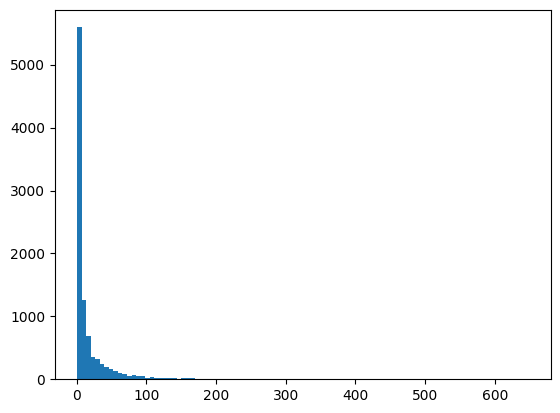

In [3]:
plt.hist(num_boxes, bins=100)
plt.show()

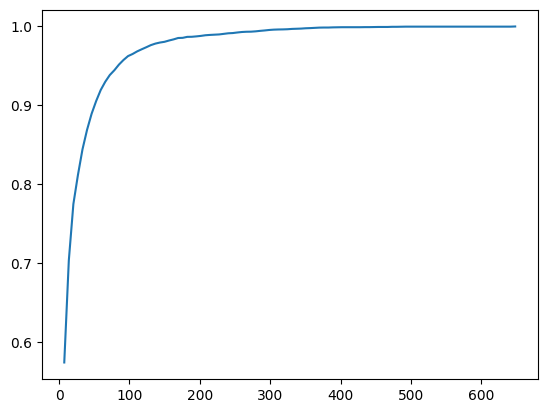

In [4]:
hist, bin_edges = np.histogram(num_boxes, bins=100)
cummulative = np.cumsum(hist)
cummulative = cummulative / np.amax(cummulative)
plt.plot(bin_edges[1:], cummulative)
plt.show()

In [5]:
print(np.quantile(num_boxes, q=[0.90, 0.95, 0.99]))

[ 50.    84.   227.67]


In [6]:
np.mean(num_boxes <= 50)

0.9008629545921513